# LQR - regulator & ref. tracking

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

# %matplotlib qt

In [5]:
def dare(A, B, Q, R, n_iter=150, eps=0.01):
    P = np.eye(len(A))
    for i in range(n_iter):
        P_ = A.T*P*A -A.T*P*B*la.inv(R + B.T*P*B)*B.T*P*A + Q
        print('\r D_ARE iter: {}'.format(i), end='')
        if abs(P_ - P).max() < eps:
            P = P_
            break
        P = P_
    K = np.matrix(la.inv(R + B.T*P*B)*B.T*P*A)
    
    return K

#### Define system

$x_{k+1} = Ax_k + Bu_k$

In [6]:
A = np.matrix([[1, 1.0], [0, 1]])
B = np.matrix([[0.0], [1.0]])
Q = np.matrix([[1.0, 0.0], [0.0, 0.0]])
R = np.matrix([[1.0]])

In [7]:
dare(A, B, Q, R, n_iter=1)

 D_ARE iter: 0

matrix([[0.4, 1. ]])

In [8]:
dare(A, B, Q, R, eps=0.001)

 D_ARE iter: 7

matrix([[0.48053307, 1.24962097]])

## 1. regulator

In [ ]:
sim_time = 15

x_ref = np.matrix([3, 0]).T
u_ref = np.matrix([0])

x_0 = np.matrix([3, 1]).T
u_0 = np.matrix([0.])

x1_list, x2_list, u_list = [], [], []
x1_list.append(x_0[0, 0])
x2_list.append(x_0[1, 0])
u_list.append(u_0[0, 0])

K = dare(A, B, Q, R)
x = x_0
u = u_0
for i in range(sim_time):
    u = - K*x
    x = A*x + B*u
    
    x1_list.append(x[0, 0])
    x2_list.append(x[1, 0])
    u_list.append(u[0, 0])

fig = plt.figure(figsize=(20, 10))
plt.plot(range(len(u_list)), u_list, "-r", label="u")
plt.plot(range(len(x1_list)), x1_list, "-b", label="x1")
plt.plot(range(len(x2_list)), x2_list, "-g", label="x2")
plt.grid()
plt.title("LQR Regulator")
plt.legend()
plt.show()

## 2. reference tracking

 D_ARE iter: 4

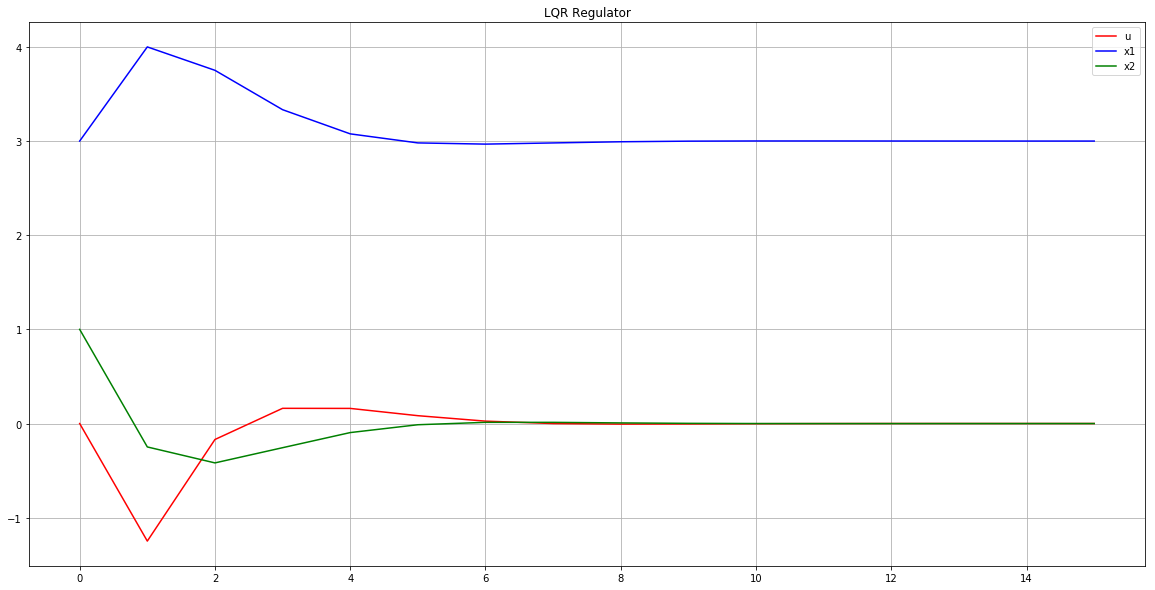

In [9]:
sim_time = 15

x_ref = np.matrix([3, 0]).T
u_ref = np.matrix([0])

x_0 = np.matrix([3, 1]).T
u_0 = np.matrix([0.])

x1_list, x2_list, u_list = [], [], []
x1_list.append(x_0[0, 0])
x2_list.append(x_0[1, 0])
u_list.append(u_0[0, 0])

K = dare(A, B, Q, R)
x = x_0
u = u_0
for i in range(sim_time):
    u = -u_ref - K*(x - x_ref)
    x = A*x + B*u
    
    x1_list.append(x[0, 0])
    x2_list.append(x[1, 0])
    u_list.append(u[0, 0])
a
fig = plt.figure(figsize=(20, 10))
plt.plot(range(len(u_list)), u_list, "-r", label="u")
plt.plot(range(len(x1_list)), x1_list, "-b", label="x1")
plt.plot(range(len(x2_list)), x2_list, "-g", label="x2")
plt.grid()
plt.title("LQR Regulator")
plt.legend()
plt.show()